## k 최근접이웃 알고리즘
* 머신러닝 분류에 자주 사용되는 대표 알고리즘
* 얼굴인식, 개인영화추천, 질병 유전자 패턴 식별에 활용
* KNN의 K는 가장 가까운 이웃 '하나'가 아니고
* 훈련데이터 중 새로운 데이터와 가장 가까운 K개의 이웃을 찾는다는 의미
* 즉, 하나의 관측값은 거리가 가까운 k개의 이웃 관측값과 비슷한 특성을 갖는다고 가정함
* 따라서, k개의 이웃의 목표변수 중 다수결로 가장 많은 범주에 속한 값을 결과로 반환
* KNN 알고리즘에서는 k를 얼마나 설정하느냐에 따라 결과와 성능이 달라짐
    + k가 작으면 데이터의 범위가 좁아짐 - 과적합 위험
    + k가 크면 데이터의 범위가 넓어짐 - 일반화 위험
    + 일반적으로 k값은 데이터 총 건수에 제곱근을 씌운 값
* 재대로 된 분석을 위해서는 각 변수에 대해 표준화 작업이 필요할 수 있다.
* 거리 측정 알고리즘 : 유클리디언, minkowski, 맨해튼

<img src = 'img/knn.png'>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
# 데이터 적재 및 분할
iris = load_iris()

In [6]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, stratify=iris.target, test_size = 0.3,random_state=2111121455)

In [10]:
# KNN 분석 1 
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)


(0.9809523809523809, 0.9333333333333333)

In [14]:
# 최적의 k값을 찾기 위해 교차검증 실시
scores = []
for k in range(30+1):
    knc = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knc, Xtrain, ytrain, cv=10, scoring='accuracy')
    scores.append(score.mean())

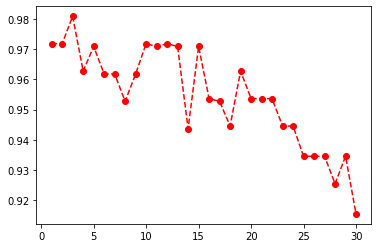

In [15]:
# 결과 시각화
plt.plot(scores, 'ro--')

## K값 선택기준
* K값에 따라 정확도가 점점 어느 순간 확 주는 지점이 생기는데 그래프상에서는 가늠하기 다소 어려움
* 자주 나나태는 정확도 지표 중 선두에 나오는 지점
* 너무 높은 정확도는 과적합의 위험이 있기 때문에 주의

In [19]:
plt.rc('font',family='NnumGothic')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [20]:
## KNN알고리즘을 이용해서 당도, 아삭함을 기준으로 과일/채소/단백질 구분
# 당도 6, 아삭함 4인 토마토는 과일인가 채소인가
fresh = pd.read_csv('csv/fresh.csv', encoding='euc-kr')

In [23]:
fresh.columns = ['name','sweet','crunchy','class']
fresh.head()

,name,sweet,crunchy,class
0,포도,8,5,과일
1,생선,2,2,단백질
2,당근,6,10,채소
3,오렌지,7,3,과일
4,샐러리,3,8,채소


<AxesSubplot:xlabel='class', ylabel='count'>

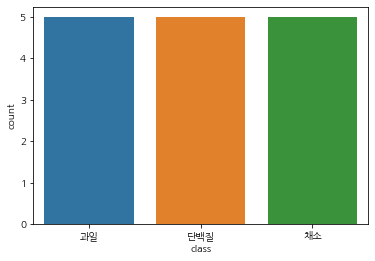

In [25]:
# 시각화
sns.countplot(x='class', data=fresh)

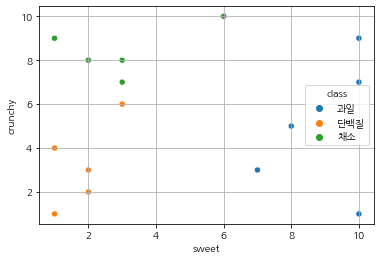

In [29]:
sns.scatterplot(x='sweet', y='crunchy', data=fresh, hue='class')
plt.grid()


In [30]:
# 데이터 전처리
fresh['target'] = pd.Categorical(fresh['class'])
fresh['target'] = fresh['target'].cat.codes
fresh.head()

,name,sweet,crunchy,class,target
0,포도,8,5,과일,0
1,생선,2,2,단백질,1
2,당근,6,10,채소,2
3,오렌지,7,3,과일,0
4,샐러리,3,8,채소,2


In [31]:
# 데이터 분리
data = fresh.iloc[:,1:3]
target = fresh.target

In [36]:
# # 교차검증으로 적절한 K 알아내기
# scores = []
# for k in range(1, 10+1):
#     knc = KNeighborsClassifier(n_neighbors=k)
#     score = cross_val_score(knc, data, target, cv=10, scoring='accuracy')
#     scores.append(score.mean())
# plt.plot(scores, 'ro-')

In [35]:
# 채택된 k값으로 모델 생성
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(data, target)
knc.score(data, target)

0.9333333333333333

In [39]:
# 당도 6, 아삭함 4인 토마토는 과일인가 채소인가
newOne = np.array([[6,4]])
pred = knc.predict(newOne)
pred   # 0 - 과일

array([0], dtype=int8)

## 농구선수 게임데이터를 이용해서 포지션 예측
* 2017 NBA 농구선수의 실제 데이터를 참고
* player 선수명, pos 포지션, 3p 3점슛 성공횟수
* 2p 2점슛 성공횟수, TRB 리바운드 성공횟수
* AST 어시스트 성공횟수, STL 스틸 성공횟수, BLK 블락 성공횟수
* SG 슈팅가드와 C센터를 구분하는 모델 생성


In [42]:
player = pd.read_csv('csv/basketball_stat.csv')
player.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [43]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


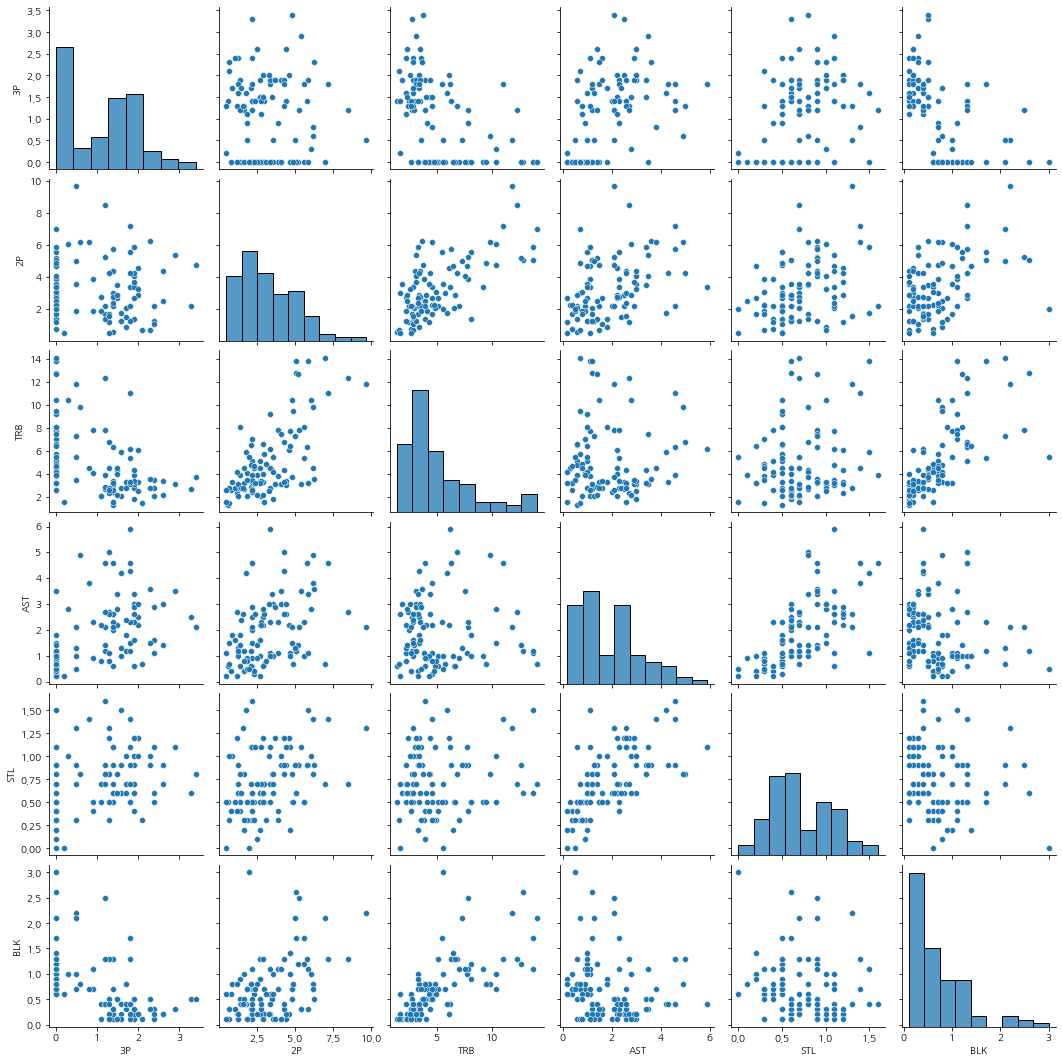

In [45]:
# 시각화
sns.pairplot(player.iloc[:, 2:])

<AxesSubplot:xlabel='Pos', ylabel='count'>

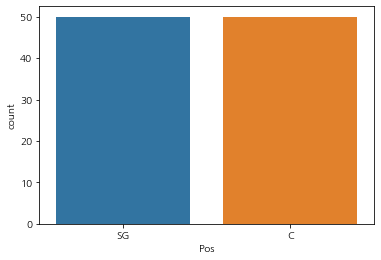

In [48]:
sns.countplot(x='Pos', data=player)

In [49]:
# 전처리
player['pos'] = pd.Categorical(player['Pos'])
player['pos'] = player['pos'].cat.codes

In [50]:
# 데이터 분할
data = player.iloc[:,2:]
target = player.pos

In [75]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, stratify=target, random_state=2111121645)

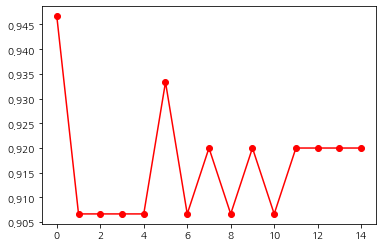

In [76]:
# 교차검증후 최적 K값 산출
scores = []

for k in range(1, 15+1):
    knc = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knc, Xtrain, ytrain, cv=5, scoring='accuracy')
    scores.append(score.mean())

plt.plot(scores, 'ro-')  # k = 5 채택

In [55]:
# 채택된 K값으로 모델 생성
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.9866666666666667, 0.96)

<AxesSubplot:xlabel='STL', ylabel='2P'>

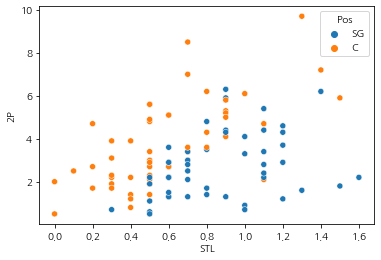

In [58]:
# 컬럼축소를 위한 시각화
# 스틸/2점슛
sns.scatterplot('STL','2P', data=player, hue='Pos')

<AxesSubplot:xlabel='AST', ylabel='2P'>

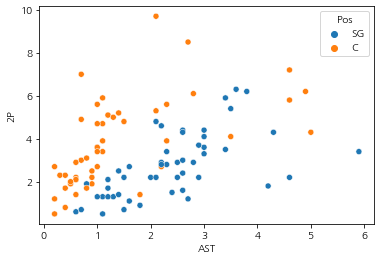

In [59]:
# AST/2P 
sns.scatterplot('AST','2P', data=player, hue='Pos')

In [ ]:
# 슈팅가드와 센터를 구분지을 경계가 명확하지 않다.


<AxesSubplot:xlabel='BLK', ylabel='3P'>

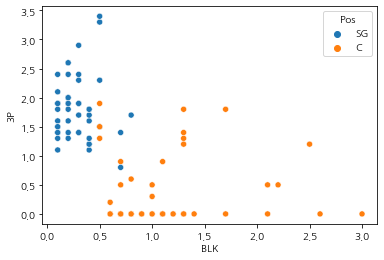

In [61]:
# BLK/3p
sns.scatterplot('BLK','3P', data=player, hue='Pos')

<AxesSubplot:xlabel='TRB', ylabel='3P'>

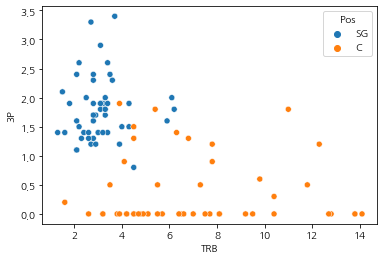

In [62]:
# TRB/3P
sns.scatterplot('TRB','3P',data=player, hue='Pos')

<AxesSubplot:xlabel='AST', ylabel='3P'>

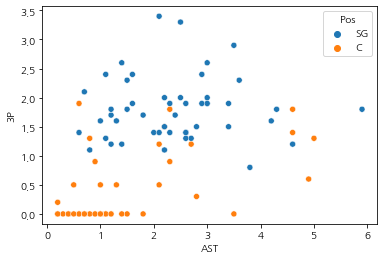

In [63]:
# AST/3P
sns.scatterplot('AST','3P', data=player, hue='Pos')

In [64]:
# 레이블인코딩의 또 다른 방법
target = target.map({'C':0, 'SG':1})

In [65]:
# 따라서, 3점슛, 블락, 리바운드등을 분석이 사용해 본다.
data = player.iloc[:, [2,4,7]]
target = player.Pos

In [71]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, stratify=target, random_state=2111121705)

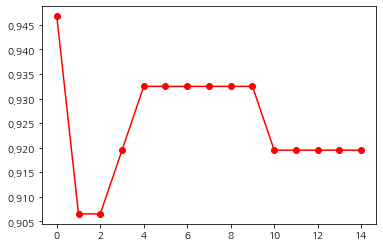

In [72]:
# 교차검증후 최적 K값 산출
scores = []

for k in range(1, 15+1):
    knc = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knc, Xtrain, ytrain, cv=7, scoring='accuracy')
    scores.append(score.mean())

plt.plot(scores, 'ro-') # k = 3 or 5

In [74]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(Xtrain, ytrain)
pred = knc.predict(Xtest)
knc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.9333333333333333, 0.88)